<a href="https://colab.research.google.com/github/xiaorui777/CV/blob/master/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# matpoltlib的使用

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

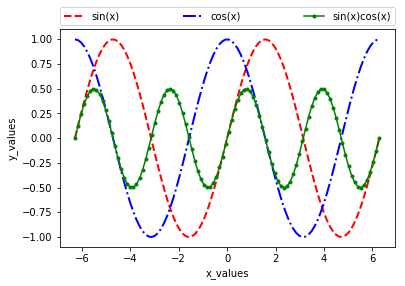

In [2]:
x = np.linspace(-2*np.pi, 2*np.pi,100)

# figure 画布， axes 坐标系统
fig, ax = plt.subplots()

# 绘制一条红色，样式为--，宽度为2，label为sin(x)的线
ax.plot(x, np.sin(x),'r--', lw=2, label = 'sin(x)')

# 绘制一条蓝色，样式为-. ，宽度为2，label为cos(x)的线
ax.plot(x, np.cos(x), color='b',linestyle='-.', linewidth=2, label = 'cos(x)')

# 绘制一条绿色，样式为o-，宽度为3，label为sin(x)cos(x)的线
ax.plot(x, np.cos(x)*np.sin(x), 'go-', ms=3, label = 'sin(x)cos(x)')

# 横坐标
ax.set_xlabel('x_values')
# 纵坐标
ax.set_ylabel('y_values')

# 图例
ax.legend(bbox_to_anchor = (0,1.02,1,0.2), loc = 'lower left', mode ='expand' , borderaxespad = 0.0, ncol = 3)

# 参考 https://matplotlib.org/gallery.html 的图形样式


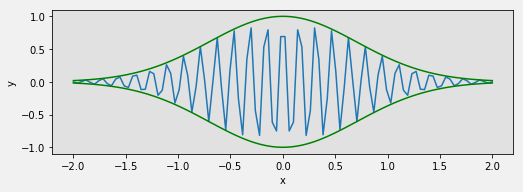

In [3]:
fig = plt.figure(figsize = (8,2.5),facecolor = '#f1f1f1') #画布背景颜色
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8  # 如果设为0，0，1，1则会看不到坐标轴的数字
ax = fig.add_axes((left, bottom,width,height), facecolor = '#e1e1e2')

x = np.linspace(-2, 2, 100)
y1 = np.cos(40*x)
y2 = np.exp(-x**2)

ax.plot(x, y1*y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')

ax.set_xlabel('x')
ax.set_ylabel('y')

fig.savefig('graph.png', dpi=300, facecolor='#f1f1f1')
# dpi：dots per inch
# 像素 = dpi * fig size
# 常用图片格式：PNG，PDF，EPS，SVG

# Axes

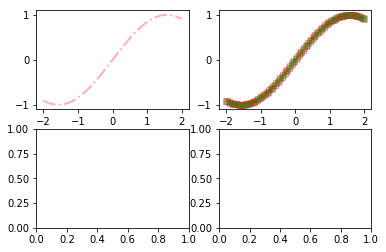

In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
axes[0,0].plot(x, np.sin(x), 'r-.', lw=2,alpha = 0.3)  # alpha为透明度
axes[0,1].plot(x, np.sin(x), 'r-.', lw=2,alpha = 0.3, marker = 's', markerfacecolor = 'g') # s = square

In [5]:
axes  # 返回numpy的数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e672ddef0>,
      dtype=object)

# 往图中加文字或注释

Text(2.0, 0.25, 'sin(x) = cos(x)')

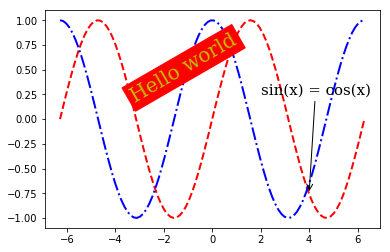

In [6]:
x = np.linspace(-2*np.pi, 2*np.pi,100)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x),'r--', lw=2, label = 'sin(x)')
ax.plot(x, np.cos(x), 'b-.', lw = 2, label = 'cos(x)')

# 往图中添加文字‘Hello world’，字体大小为20，字体样式为‘serif’，字体框背景为red，字体颜色为yellow，旋转30度
ax.text(-3.5, 0.75, 'Hello world', fontsize = 20, family = 'serif', backgroundcolor = 'r', color = 'y', rotation = 30)

# 往图中添加注释
ax.annotate('sin(x) = cos(x)',
                  fontsize = 15, family = 'serif',       
                  xy = (4, -0.75),      # 点的位置
                  xytext = (2.0, 0.25),      # 字的位置
                  arrowprops = dict(arrowstyle = '->'))


# Twin axes

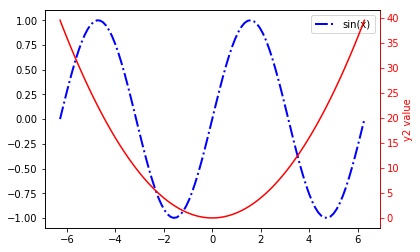

In [7]:
x = np.linspace(-2*np.pi, 2*np.pi,100)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), 'b-.', lw = 2, label = 'sin(x)')

# twin axes
ax2 = ax.twinx()
p2, = ax2.plot(x, x**2, 'r')

for label in ax2.get_yticklabels():
    label.set_color('red')
ax2.set_ylabel('y2 value', color = p2.get_color())

ax2.spines['right'].set_color(p2.get_color())

ax2.tick_params(axis = 'y', colors = p2.get_color())
ax.legend()

# Insert plot

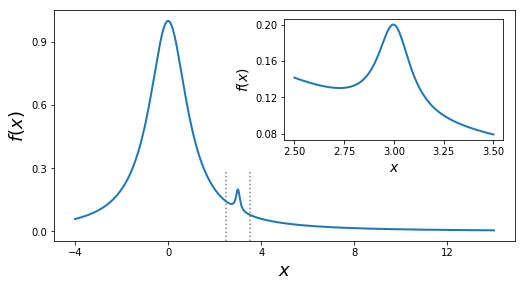

In [8]:
fig = plt.figure(figsize = (8,4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth = 2)
    
    # x坐标轴设为5格，y坐标轴设为4格
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r'$x$', fontsize = fontsize)
    ax.set_ylabel(r'$f(x)$', fontsize = fontsize)
   
 # main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8])
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

 # inset (画两条虚线)
x0, x1 = 2.5, 3.5
# axvline（画一条垂直线）
ax.axvline(x0, ymax = 0.3, color = 'grey', linestyle = ':')
ax.axvline(x1, ymax = 0.3, color = 'grey', linestyle = ':')

# 小图
ax = fig.add_axes([0.5, 0.5, 0.38, 0.42])
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

# 绘制散点图

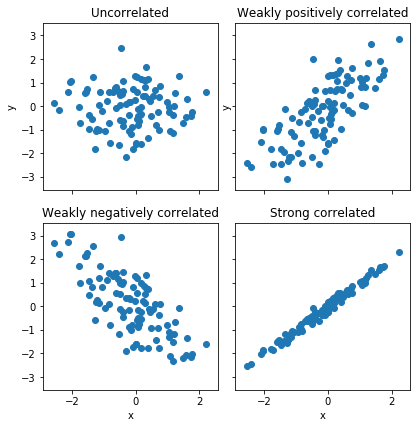

In [9]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)

# 画布为两行两列，大小为6*6， 共享x，y轴
fig, axes = plt.subplots(2, 2, figsize = (6, 6), sharex = True, sharey = True)

# axes返回矩阵，可以用通常的矩阵坐标的方式调用
axes[0,0].set_title('Uncorrelated')
# scatter (绘制散点图)
axes[0,0].scatter(x1, x2)

axes[0,1].set_title('Weakly positively correlated')
axes[0,1].scatter(x1,x1+x2)

axes[1,0].set_title('Weakly negatively correlated')
axes[1,0].scatter(x1, -x1+x2)

axes[1,1].set_title('Strong correlated')
axes[1,1].scatter(x1, x1 + 0.15 * x2)

axes[1,1].set_xlabel('x')
axes[1,0].set_xlabel('x')
axes[0,1].set_ylabel('y')
axes[0,0].set_ylabel('y')

# 调整间距
plt.subplots_adjust(left = 0.1, right = 0.95, bottom = 0.1, top = 0.95, wspace = 0.1, hspace = 0.2)

# subplot2grid 函数：绘制不规则的子画布

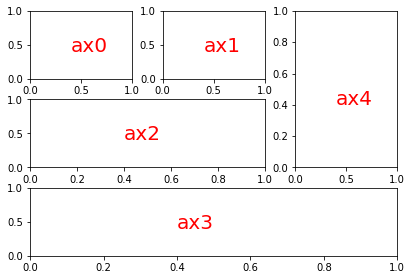

In [10]:
# 将画布平均分为3行3列，ax0 位于（0，0）的位置
ax0 = plt.subplot2grid((3, 3),(0, 0))
ax0.text(0.4,0.4, 'ax0',fontsize = 20,color = 'r')

# 将画布平均分为3行3列，ax1 位于（0，1）的位置
ax1 = plt.subplot2grid((3, 3),(0, 1))
ax1.text(0.4,0.4, 'ax1',fontsize = 20,color = 'r')

# ax2 位于（1，0）的位置上，宽度占两列
ax2 = plt.subplot2grid((3,3),(1,0),colspan = 2)
ax2.text(0.4,0.4, 'ax2',fontsize = 20,color = 'r')

# ax3 位于（2，0）的位置上，宽度占三列
ax3 = plt.subplot2grid((3,3),(2,0),colspan = 3)
ax3.text(0.4,0.4, 'ax3', fontsize = 20, color = 'r')

# ax4 位于（0，2）的位置上，列长占两列
ax4 = plt.subplot2grid((3,3),(0,2),rowspan = 2)
ax4.text(0.4,0.4, 'ax4', fontsize = 20, color = 'r')

# 调整间距
plt.subplots_adjust(left = 0.1, right = 0.95, bottom = 0.1, top = 0.95, wspace = 0.3, hspace = 0.3)

In [0]:
#  如果要更改一些配置的话可以用 ：plt.rcParams 进行更改
#  plt.rcParams['text.suetex'] = True

In [12]:
# 也可以在配置文件中更改，配置文件位置：
mpl.matplotlib_fname()

'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'

# Sympy (符号计算)

In [0]:
import sympy

In [0]:
sympy.init_printing()

In [0]:
from sympy import I, pi, oo

In [0]:
x = sympy.Symbol('x')
y = sympy.Symbol('y', positive = True)


In [17]:
sympy.sqrt(x ** 2)

$$\sqrt{x^{2}}$$

In [18]:
# y 为实数就会自动化简为 y (positive = True)
sympy.sqrt(y**2)

In [0]:
# 可以将符号导入变量中
x = sympy.symbols('x1')

In [20]:
x

$$x_{1}$$

## functions 的定义

In [21]:
x, y, z = sympy.symbols('x, y, z')
f = sympy.Function('f')
type(f)

sympy.core.function.UndefinedFunction

In [22]:
f(x)

$$f{\left (x \right )}$$

In [23]:
# 矩阵
a, b, c, d = sympy.symbols('a, b, c, d')
M = sympy.Matrix([[a, b], [c, d]])
M

⎡a  b⎤
⎢    ⎥
⎣c  d⎦

$$\left[\begin{matrix}a & b\\c & d\end{matrix}\right]$$



In [24]:
# 符号运算
M*M

⎡ 2                  ⎤
⎢a  + b⋅c   a⋅b + b⋅d⎥
⎢                    ⎥
⎢                  2 ⎥
⎣a⋅c + c⋅d  b⋅c + d  ⎦

$$\left[\begin{matrix}a^{2} + b c & a b + b d\\a c + c d & b c + d^{2}\end{matrix}\right]$$